In [1]:
from grism_sim_psf_dependent import mk_grism
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy as np
import os

/Users/keith/miniconda3/envs/grizli-env/lib/python3.12/site-packages/pysynphot/refs.py:117: UserWarning: No graph or component tables found; functionality will be SEVERELY crippled. No files found for /Users/keith/PYSYN_CDBS/mtab/*_tmg.fits
  warnings.warn('No graph or component tables found; '
/Users/keith/miniconda3/envs/grizli-env/lib/python3.12/site-packages/pysynphot/refs.py:124: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /Users/keith/PYSYN_CDBS/mtab/*_tmt.fits
  warnings.warn('No thermal tables found, '


psf_grid_data_write variable has not been set. This will cause problems if psf_grid fits do not already exist.


In [ ]:
# Catalogs
scratch = os.getenv("SCRATCH")
# stars = Table.read(os.path.join(scratch, "data/sim_star_cat_galacticus.ecsv"))
stars = Table.read("/global/cfs/cdirs/m4943/grismsim/stars/sim_star_cat_galacticus.ecsv")
gals = None

sel = stars["magnitude"] <= 16
stars = stars[sel]

In [ ]:
# Pointing
wfi_cen_ra = 10
wfi_cen_dec = 0
wfi_cen_pa = 60

In [4]:
# SCA
det_num = 1

In [ ]:
model = mk_grism(wfi_cen_ra=wfi_cen_ra,
                 wfi_cen_dec=wfi_cen_dec,
                 wfi_cen_pa=wfi_cen_pa,
                 det_num=det_num,
                 star_input=stars,
                 gal_input=gals,
                 output_dir=scratch)

checkpoint_0
checkpoint_1
checkpoint_2


 [astropy.io.fits.verify]


checkpoint_3
cutting stars to be on detector + padded area
checkpoint_4
checkpoint_5




Image cutout: x=slice(0, 6088, None), y=slice(0, 6088, None) [Out of range]
/Users/keith/astr/research_astr/SCRATCH/empty_grism_ra10_dec0_pa60_detSCA01.fits / blot reference /Users/keith/astr/research_astr/SCRATCH/refimage_ra10_dec0_pa60_detSCA01_nopad.fits[0]
The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       config_testbed      imagefindpars           mapreg       
       photeq            pixreplace           pixtopix            pixtosky      
  refimagefindpars       resetbits          runastrodriz          skytopix      
     tweakback            tweakreg           updatenpol
Using default C-based coordinate transformation...
checkpoint_6
starting at 10000.0
adding stars to model
starting at 10500.0
adding stars to model
ID 9 not found in segmentation image
ID 13 not found in segmentation image

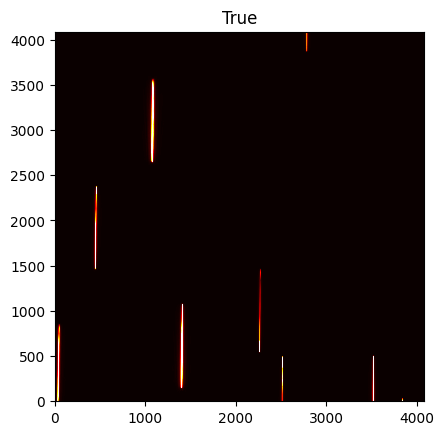

In [6]:
with fits.open(os.path.join(scratch, "grism_ra10_dec0_pa60_detSCA01.fits")) as f:
    m = f[4].data
    plt.imshow(m, cmap="hot", vmin=0, vmax=1, origin="lower", interpolation="nearest")
    plt.title(np.any(m))

Text(0.5, 1.0, 'True')

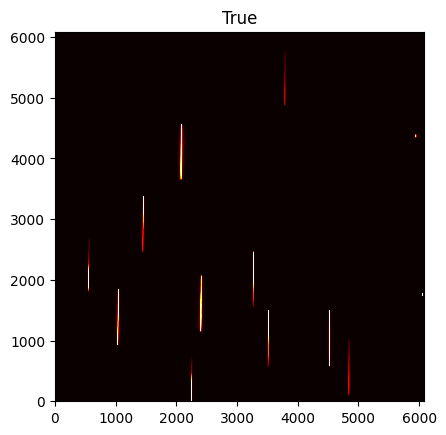

In [7]:
plt.imshow(model, cmap="hot", vmin=0, vmax=1, origin="lower", interpolation="nearest")
plt.title(np.any(model))